<a href="https://colab.research.google.com/github/Baohikari/World_Data_2023_Clustering/blob/main/World_data_2023_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('world-data-2023.csv')

In [ ]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [ ]:
df.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


In [ ]:
columns = ['GDP', 'Life expectancy', 'Unemployment rate',
                  'Infant mortality', 'Physicians per thousand',
                  'Gross tertiary education enrollment (%)', 'Out of pocket health expenditure']
df_selected = df[columns]

In [ ]:
df_selected.head()

,GDP,Life expectancy,Unemployment rate,Infant mortality,Physicians per thousand,Gross tertiary education enrollment (%),Out of pocket health expenditure
0,"$19,101,353,833",64.5,11.12%,47.9,0.28,9.70%,78.40%
1,"$15,278,077,447",78.5,12.33%,7.8,1.20,55.00%,56.90%
2,"$169,988,236,398",76.7,11.70%,20.1,1.72,51.40%,28.10%
3,"$3,154,057,987",NaN,NaN,2.7,3.33,NaN,36.40%
4,"$94,635,415,870",60.8,6.89%,51.6,0.21,9.30%,33.40%


<Axes: >

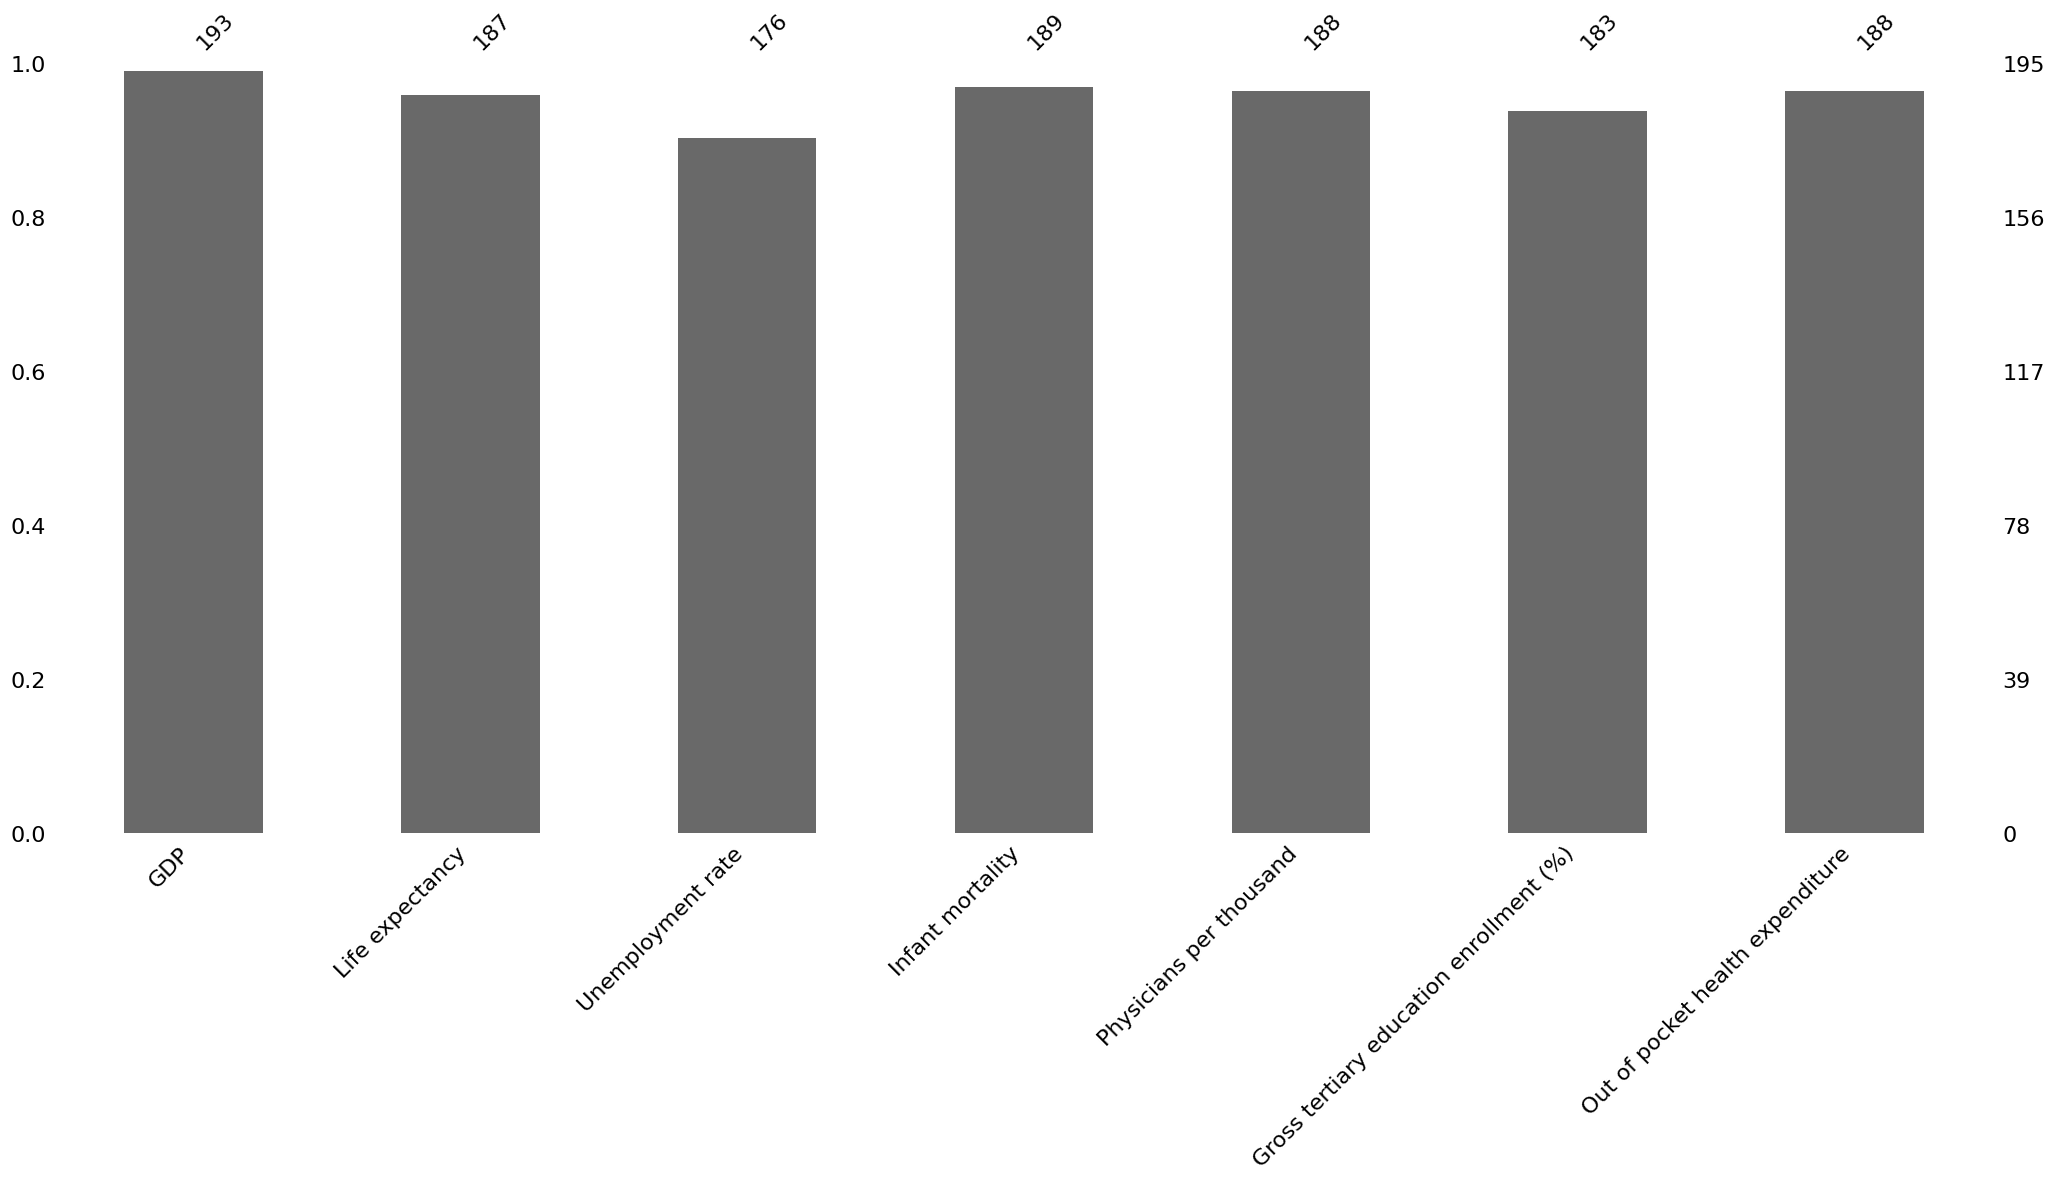

In [ ]:
  #Kiểm tra missing values
import missingno as mssno
mssno.bar(df_selected)

# XỬ LÝ THUỘC TÍNH GDP

In [ ]:
df_selected['GDP'].dtype

dtype('O')

In [ ]:
df_selected['GPD'] = pd.to_numeric(df_selected['GDP'], errors='coerce')

<ipython-input-9-29384e2e61f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['GPD'] = pd.to_numeric(df_selected['GDP'], errors='coerce')


In [ ]:
df_selected["GDP"] = df_selected["GDP"].fillna(0)

<ipython-input-10-024a1b10a4ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["GDP"] = df_selected["GDP"].fillna(0)


In [ ]:
df_selected["GDP"] = df_selected["GDP"].astype(str)

# Loại bỏ ký hiệu $ và dấu phẩy, sau đó chuyển về float
df_selected["GDP"] = (
    df_selected["GDP"]
    .str.replace(r"[^0-9.]", "", regex=True)  # Xóa mọi ký tự không phải số hoặc dấu chấm
    .astype(float)  # Chuyển thành kiểu số
)

<ipython-input-11-359313cca0a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["GDP"] = df_selected["GDP"].astype(str)
<ipython-input-11-359313cca0a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["GDP"] = (


In [ ]:
# Tính giá trị trung bình của GDP (bỏ qua các giá trị 0)
mean_gdp = df_selected[df_selected["GDP"] != 0]["GDP"].mean()

# Thay thế giá trị 0 bằng giá trị trung bình
df_selected["GDP"] = df_selected["GDP"].replace(0, mean_gdp)

<ipython-input-12-013d57099276>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["GDP"] = df_selected["GDP"].replace(0, mean_gdp)


In [ ]:
df_selected.head()

,GDP,Life expectancy,Unemployment rate,Infant mortality,Physicians per thousand,Gross tertiary education enrollment (%),Out of pocket health expenditure,GPD
0,1.910135e+10,64.5,11.12%,47.9,0.28,9.70%,78.40%,NaN
1,1.527808e+10,78.5,12.33%,7.8,1.20,55.00%,56.90%,NaN
2,1.699882e+11,76.7,11.70%,20.1,1.72,51.40%,28.10%,NaN
3,3.154058e+09,NaN,NaN,2.7,3.33,NaN,36.40%,NaN
4,9.463542e+10,60.8,6.89%,51.6,0.21,9.30%,33.40%,NaN


In [ ]:
df_selected.drop(columns=['GPD'])

,GDP,Life expectancy,Unemployment rate,Infant mortality,Physicians per thousand,Gross tertiary education enrollment (%),Out of pocket health expenditure
0,1.910135e+10,64.5,11.12%,47.9,0.28,9.70%,78.40%
1,1.527808e+10,78.5,12.33%,7.8,1.20,55.00%,56.90%
2,1.699882e+11,76.7,11.70%,20.1,1.72,51.40%,28.10%
3,3.154058e+09,NaN,NaN,2.7,3.33,NaN,36.40%
4,9.463542e+10,60.8,6.89%,51.6,0.21,9.30%,33.40%
...,...,...,...,...,...,...,...
190,4.823593e+11,72.1,8.80%,21.4,1.92,79.30%,45.80%
191,2.619212e+11,75.3,2.01%,16.5,0.82,28.50%,43.50%
192,2.691440e+10,66.1,12.91%,42.9,0.31,10.20%,81.00%
193,2.306472e+10,63.5,11.43%,40.4,1.19,4.10%,27.50%


# XỬ LÝ THUỘC TÍNH LIFE EXPECTANCY

In [ ]:
df_selected['Life expectancy'].dtype

dtype('float64')

In [ ]:
df_selected['Life expectancy'] = df_selected['Life expectancy'].fillna(df['Life expectancy'].mean())

<ipython-input-16-452e60c35944>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Life expectancy'] = df_selected['Life expectancy'].fillna(df['Life expectancy'].mean())


# XỬ LÝ THUỘC TÍNH UNEMPLOYMENT RATE

In [ ]:
df_selected['Unemployment rate'].dtype

dtype('O')

In [ ]:
df_selected["Unemployment rate"] = df_selected["Unemployment rate"].fillna(0)

<ipython-input-18-8a0ff8b01fab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Unemployment rate"] = df_selected["Unemployment rate"].fillna(0)


In [ ]:
df_selected["Unemployment rate"] = df_selected["Unemployment rate"].astype(str)

# Loại bỏ ký hiệu $ và dấu phẩy, sau đó chuyển về float
df_selected["Unemployment rate"] = (
    df_selected["Unemployment rate"]
    .str.replace(r"[^0-9.]", "", regex=True)  # Xóa mọi ký tự không phải số hoặc dấu chấm
    .astype(float)  # Chuyển thành kiểu số
)

<ipython-input-19-d6c36a201aeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Unemployment rate"] = df_selected["Unemployment rate"].astype(str)
<ipython-input-19-d6c36a201aeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Unemployment rate"] = (


In [ ]:
df_selected['Unemployment rate'].head()

,Unemployment rate
0,11.12
1,12.33
2,11.70
3,0.00
4,6.89


In [ ]:
mean_unemployment = df_selected[df_selected["Unemployment rate"] != 0.0]["Unemployment rate"].mean()

In [ ]:
df_selected["Unemployment rate"] = df_selected["Unemployment rate"].replace(0.0, mean_unemployment)

<ipython-input-22-2a9abc9d9ee0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Unemployment rate"] = df_selected["Unemployment rate"].replace(0.0, mean_unemployment)


In [ ]:
df_selected['Unemployment rate'].head()

,Unemployment rate
0,11.120000
1,12.330000
2,11.700000
3,6.886364
4,6.890000


# XỬ LÝ THUỘC TÍNH INFANT MORTALITY

In [ ]:
df_selected['Infant mortality'].dtype

dtype('float64')

In [ ]:
df_selected['Infant mortality'] = df_selected['Infant mortality'].fillna(df['Infant mortality'].mean())

<ipython-input-25-617380862086>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Infant mortality'] = df_selected['Infant mortality'].fillna(df['Infant mortality'].mean())


# XỬ LÝ THUỘC TÍNH PHYSICIANS PER THOUSAND

In [ ]:
df_selected['Physicians per thousand'].dtype

dtype('float64')

In [ ]:
df_selected['Physicians per thousand'] = df_selected['Physicians per thousand'].fillna(df['Physicians per thousand'].mean())

<ipython-input-27-b7b51338141d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Physicians per thousand'] = df_selected['Physicians per thousand'].fillna(df['Physicians per thousand'].mean())


# XỬ LÝ THUỘC TÍNH Gross tertiary education enrollment

In [ ]:
df_selected['Gross tertiary education enrollment (%)'].dtype

dtype('O')

In [ ]:
df_selected['Gross tertiary education enrollment (%)'].head()

,Gross tertiary education enrollment (%)
0,9.70%
1,55.00%
2,51.40%
3,NaN
4,9.30%


In [ ]:
df_selected["Gross tertiary education enrollment (%)"] = df_selected["Gross tertiary education enrollment (%)"].fillna(0)

<ipython-input-30-12ceea822566>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Gross tertiary education enrollment (%)"] = df_selected["Gross tertiary education enrollment (%)"].fillna(0)


In [ ]:
df_selected["Gross tertiary education enrollment (%)"] = df_selected["Gross tertiary education enrollment (%)"].astype(str)

# Loại bỏ ký hiệu $ và dấu phẩy, sau đó chuyển về float
df_selected["Gross tertiary education enrollment (%)"] = (
    df_selected["Gross tertiary education enrollment (%)"]
    .str.replace(r"[^0-9.]", "", regex=True)  # Xóa mọi ký tự không phải số hoặc dấu chấm
    .astype(float)  # Chuyển thành kiểu số
)

<ipython-input-31-13c4fc45d21e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Gross tertiary education enrollment (%)"] = df_selected["Gross tertiary education enrollment (%)"].astype(str)
<ipython-input-31-13c4fc45d21e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Gross tertiary education enrollment (%)"] = (


In [ ]:
df_selected['Gross tertiary education enrollment (%)'].dtype

dtype('float64')

In [ ]:
mean_gross = df_selected[df_selected["Gross tertiary education enrollment (%)"] != 0.0]["Gross tertiary education enrollment (%)"].mean()

In [ ]:
df_selected["Gross tertiary education enrollment (%)"] = df_selected["Gross tertiary education enrollment (%)"].replace(0.0, mean_gross)

<ipython-input-34-3908ffd8b43a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Gross tertiary education enrollment (%)"] = df_selected["Gross tertiary education enrollment (%)"].replace(0.0, mean_gross)


In [ ]:
df_selected['Gross tertiary education enrollment (%)'].head()

,Gross tertiary education enrollment (%)
0,9.700000
1,55.000000
2,51.400000
3,37.963388
4,9.300000


# XỬ LÝ THUỘC TÍNH Out of pocket health expenditure

In [ ]:
df_selected['Out of pocket health expenditure'].head()

,Out of pocket health expenditure
0,78.40%
1,56.90%
2,28.10%
3,36.40%
4,33.40%


In [ ]:
df_selected["Out of pocket health expenditure"] = df_selected["Out of pocket health expenditure"].fillna(0)

<ipython-input-37-1ea7c2450aa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Out of pocket health expenditure"] = df_selected["Out of pocket health expenditure"].fillna(0)


In [ ]:
df_selected["Out of pocket health expenditure"] = df_selected["Out of pocket health expenditure"].astype(str)

# Loại bỏ ký hiệu $ và dấu phẩy, sau đó chuyển về float
df_selected["Out of pocket health expenditure"] = (
    df_selected["Out of pocket health expenditure"]
    .str.replace(r"[^0-9.]", "", regex=True)  # Xóa mọi ký tự không phải số hoặc dấu chấm
    .astype(float)  # Chuyển thành kiểu số
)

<ipython-input-38-74f4cdab5bba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Out of pocket health expenditure"] = df_selected["Out of pocket health expenditure"].astype(str)
<ipython-input-38-74f4cdab5bba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Out of pocket health expenditure"] = (


In [ ]:
mean_expenditure = df_selected[df_selected["Out of pocket health expenditure"] != 0.0]["Out of pocket health expenditure"].mean()

In [ ]:
df_selected["Out of pocket health expenditure"] = df_selected["Out of pocket health expenditure"].replace(0.0, mean_expenditure)

<ipython-input-40-689ddac148ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Out of pocket health expenditure"] = df_selected["Out of pocket health expenditure"].replace(0.0, mean_expenditure)


In [ ]:
df_selected["Out of pocket health expenditure"].head()

,Out of pocket health expenditure
0,78.4
1,56.9
2,28.1
3,36.4
4,33.4


<Axes: >

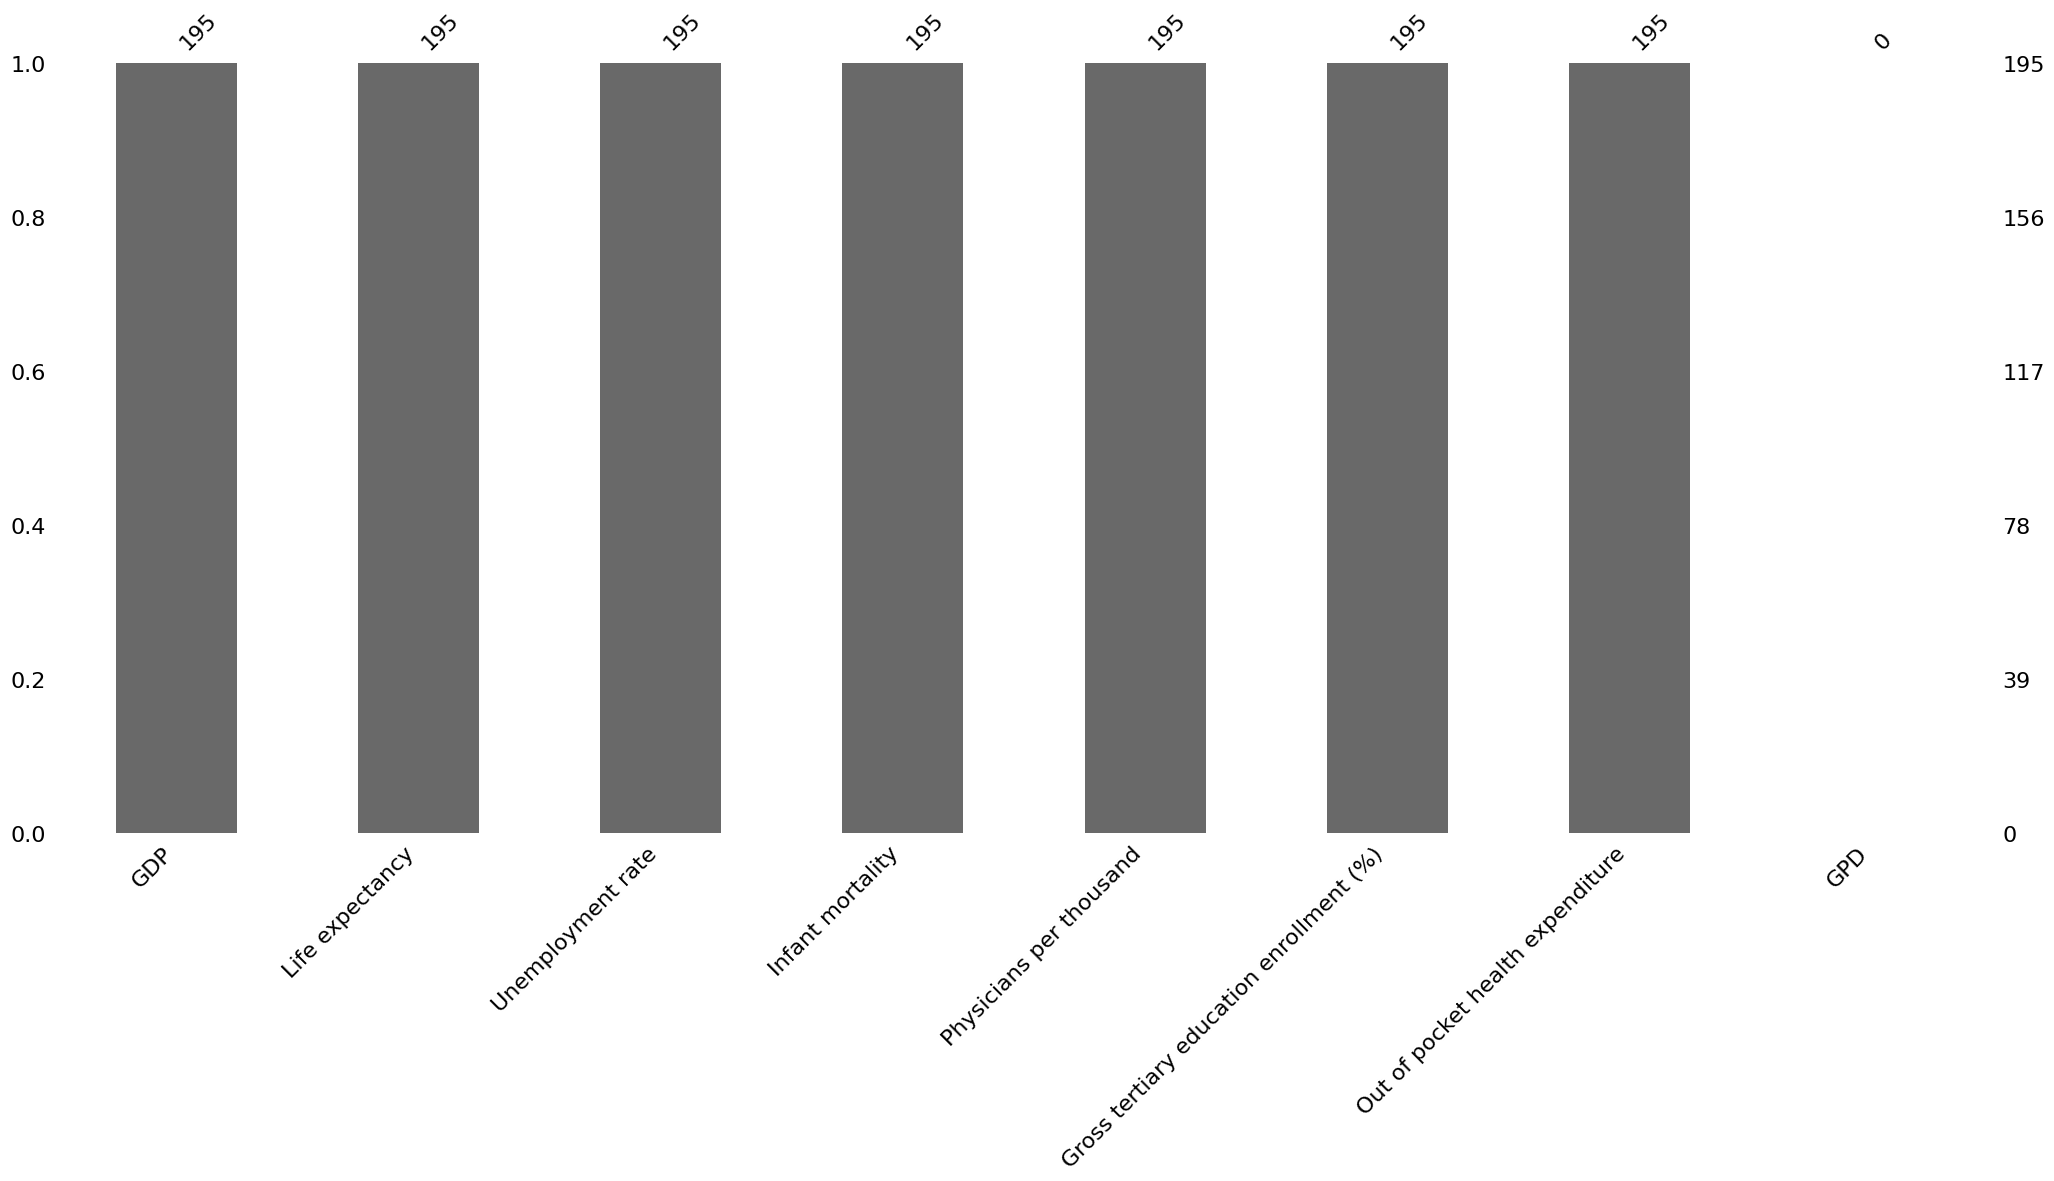

In [ ]:
mssno.bar(df_selected)

In [ ]:
df_clean = df_selected.drop(columns=['GPD'])

<Axes: >

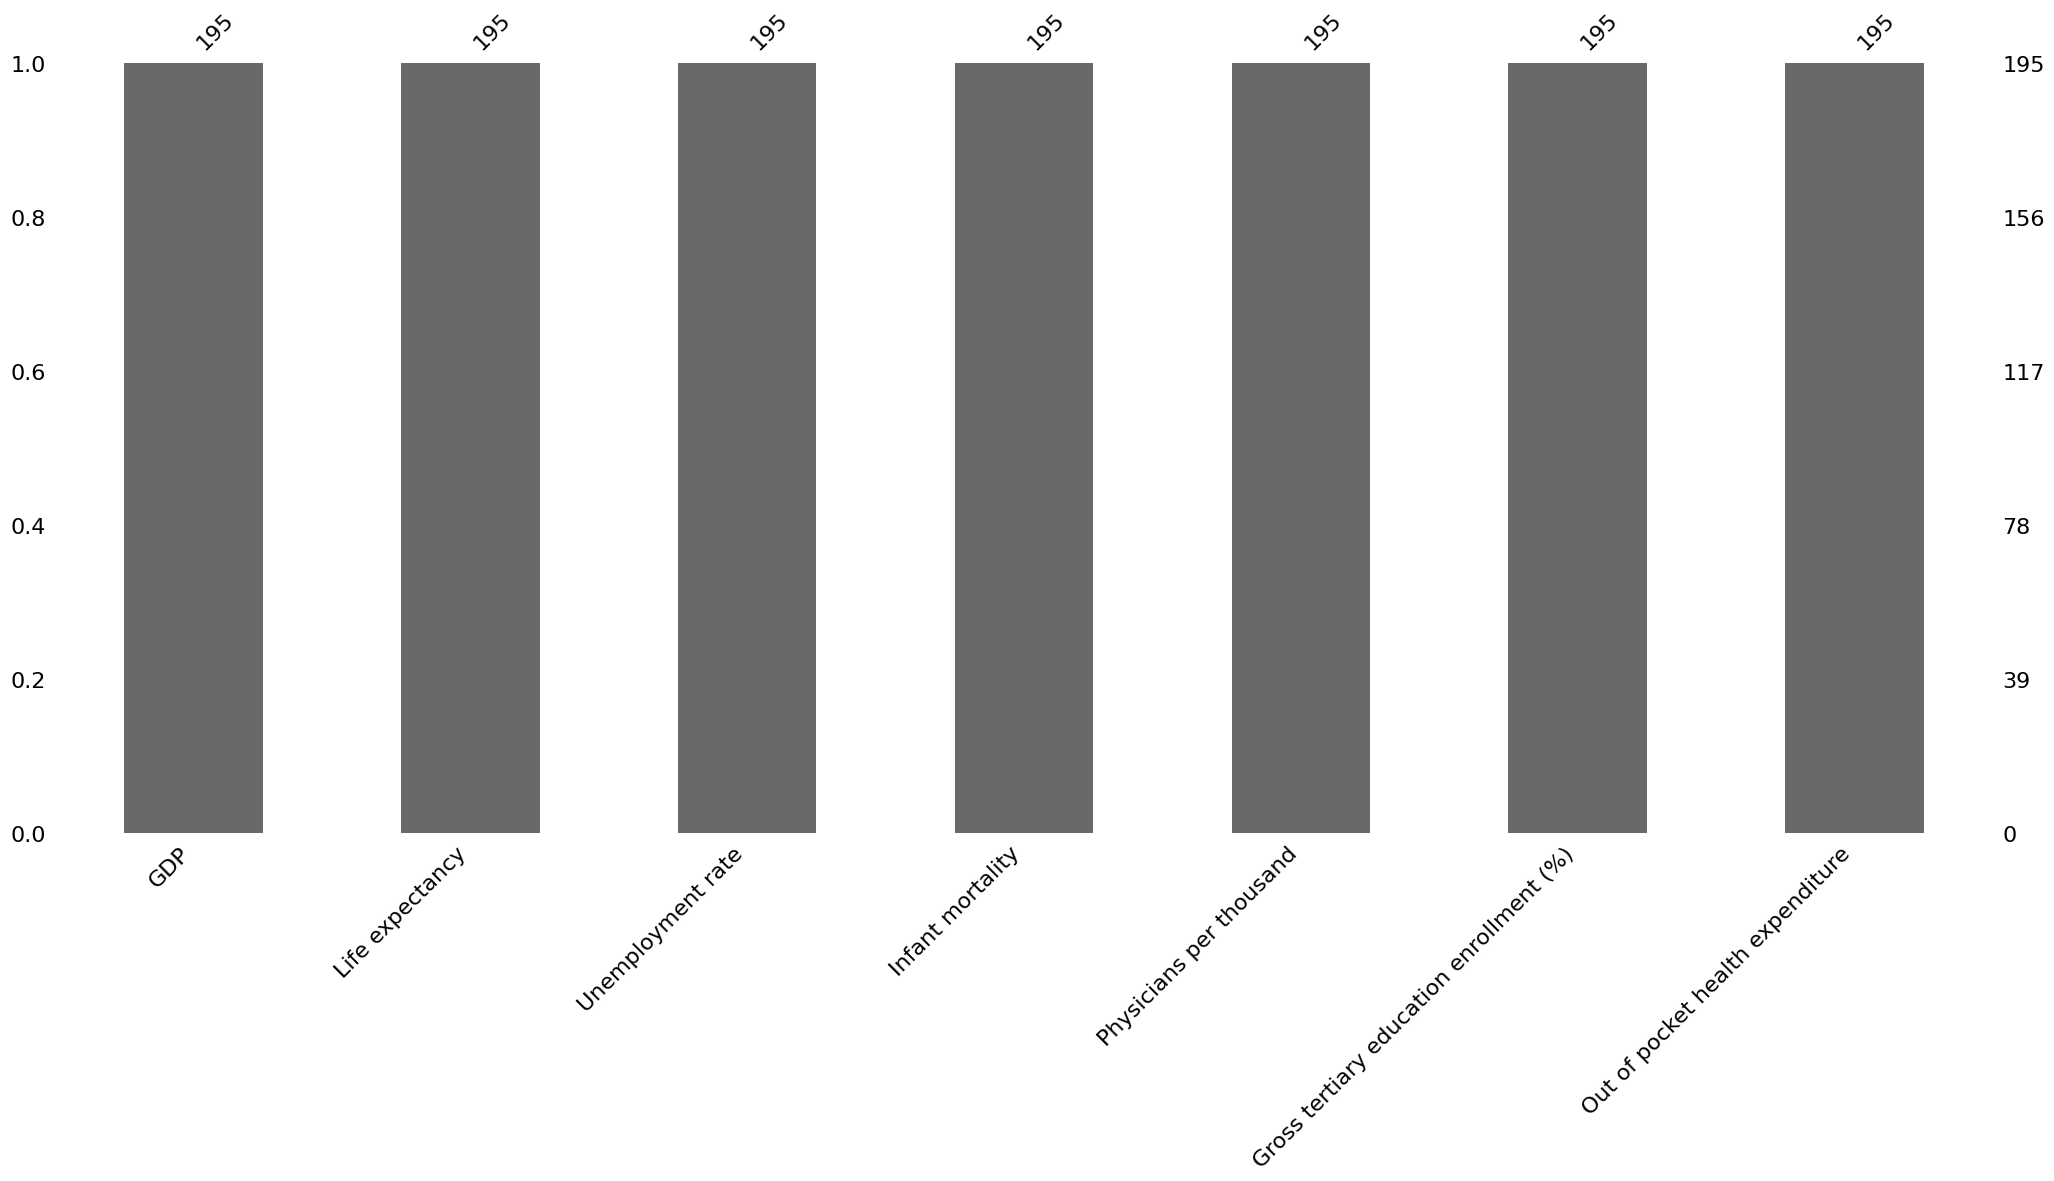

In [ ]:
mssno.bar(df_clean)

In [ ]:
df_clean.head()

,GDP,Life expectancy,Unemployment rate,Infant mortality,Physicians per thousand,Gross tertiary education enrollment (%),Out of pocket health expenditure
0,1.910135e+10,64.500000,11.120000,47.9,0.28,9.700000,78.4
1,1.527808e+10,78.500000,12.330000,7.8,1.20,55.000000,56.9
2,1.699882e+11,76.700000,11.700000,20.1,1.72,51.400000,28.1
3,3.154058e+09,72.279679,6.886364,2.7,3.33,37.963388,36.4
4,9.463542e+10,60.800000,6.890000,51.6,0.21,9.300000,33.4


In [ ]:
df_clean.to_csv("clean_world_data.csv", index=False)

# XỬ LÝ ĐỀ TÀI

In [ ]:
df_country = df['Country']

In [ ]:
df_clean = pd.concat([df_country, df_clean], axis=1)
df_clean.head()

,Country,GDP,Life expectancy,Unemployment rate,Infant mortality,Physicians per thousand,Gross tertiary education enrollment (%),Out of pocket health expenditure
0,Afghanistan,1.910135e+10,64.500000,11.120000,47.9,0.28,9.700000,78.4
1,Albania,1.527808e+10,78.500000,12.330000,7.8,1.20,55.000000,56.9
2,Algeria,1.699882e+11,76.700000,11.700000,20.1,1.72,51.400000,28.1
3,Andorra,3.154058e+09,72.279679,6.886364,2.7,3.33,37.963388,36.4
4,Angola,9.463542e+10,60.800000,6.890000,51.6,0.21,9.300000,33.4


# USE KMEANS

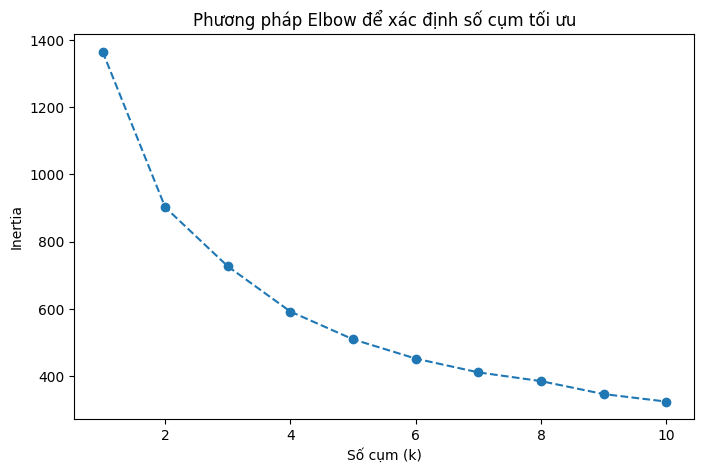

               Country  Cluster_KMeans
0          Afghanistan               1
1              Albania               2
2              Algeria               2
3              Andorra               2
4               Angola               1
5  Antigua and Barbuda               2
6            Argentina               2
7              Armenia               2
8            Australia               2
9              Austria               2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu (đảm bảo df_clean đã có cột 'Country')
df_copy = df_clean.copy()

# Loại bỏ cột 'Country' để chỉ xử lý số
X = df_copy.drop(columns=['Country'])

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tìm số cụm tối ưu bằng phương pháp Elbow
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow để xác định số cụm tối ưu')
plt.show()

# Chọn số cụm k tối ưu (ví dụ k=3, bạn có thể thay đổi)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_copy['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Hiển thị kết quả
print(df_copy[['Country', 'Cluster_KMeans']].head(10))

# Lưu kết quả vào file CSV
df_copy.to_csv("country_clusters.csv", index=False)


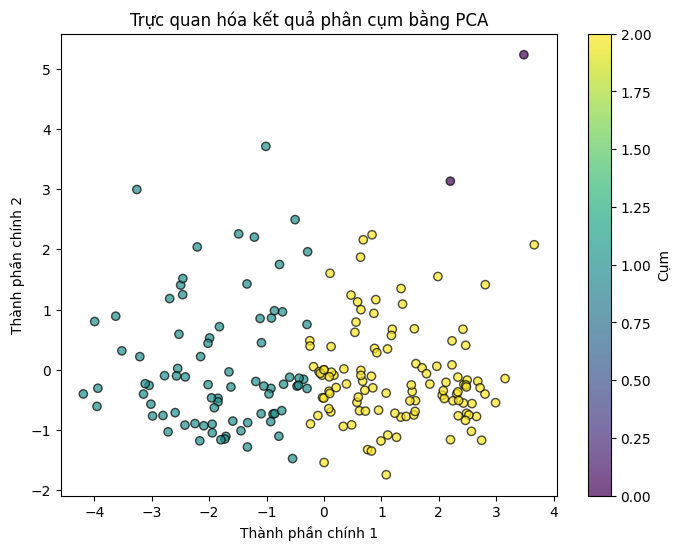

In [ ]:
from sklearn.decomposition import PCA

# Giảm số chiều về 2D để trực quan hóa
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Vẽ scatter plot với màu theo cụm
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_copy['Cluster_KMeans'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.title('Trực quan hóa kết quả phân cụm bằng PCA')
plt.colorbar(label='Cụm')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Tính silhouette score
silhouette_avg = silhouette_score(X_scaled, df_copy['Cluster_KMeans'])

print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.3385


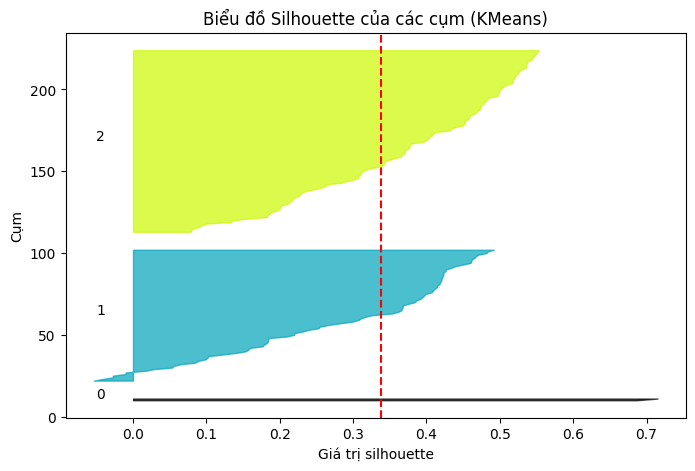

In [ ]:
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples

# Tính giá trị silhouette cho từng điểm dữ liệu
sample_silhouette_values = silhouette_samples(X_scaled, df_copy['Cluster_KMeans'])

# Vẽ biểu đồ Silhouette
plt.figure(figsize=(8, 5))
y_lower = 10
for i in range(k_optimal):
    ith_cluster_silhouette_values = sample_silhouette_values[df_copy['Cluster_KMeans'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k_optimal)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Khoảng cách giữa các cụm

plt.xlabel("Giá trị silhouette")
plt.ylabel("Cụm")
plt.title("Biểu đồ Silhouette của các cụm (KMeans)")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi_score = davies_bouldin_score(X_scaled, df_copy['Cluster_KMeans'])

print(f"Davies-Bouldin Index: {dbi_score:.4f}")

Davies-Bouldin Index: 0.8994
